# Kaggle - Titanic: Machine Learning from Disaster

## Index:
    1. Data Understanding
    2. Data Preparation
    3. Modeling
    4. Evaluation
    5. Predict result

## Goal:
To predict if a passenger survived in the Titanic sinking accident.
The prediction is 0 or 1. (0 represents die out while 1 represent survive)

## Metric:
Accuracy score metrix was used to evluate the model

In [14]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from util_plot import barplot_survived_rate
from IPython.display import display
from scipy.stats import boxcox
import re

%matplotlib inline
sns.set(color_codes = True)
plt.figure.rcParams = 20,15

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Overview

The data was split into two groups:
- training set (train.csv)
- test set (test.csv)

## Data Dictionary

|  Variable  |  Defintion  |  Key                      |
|------------|-------------|---------------------------|
|  survival  | Survival    | 0 = No, 1 = Yes           |
|  pclass    | Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd |
|    sex     | Sex         |                           |
|    Age|Age in years||
|sibsp| # of sibling/spouses aboard the Titanic ||
| parch| # of parents / children aboard the Titanic||
| ticket| Ticket number||
| fare |Passenger fare||
| cabin |Cabin number||
| embarked |Port of Embarkation| C = Cerbourg, Q = Queenstown, S = Southampton|

## Variable Notes
<b>pclass</b>: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

<b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

<b>sibsp</b>: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

<b>parch</b>: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [15]:
# Read csv as dataframe
df = pd.read_csv('train.csv')

# Set PassengerID as Index
df.set_index('PassengerId',inplace=True)
df.index.names = ['ID']

## Statistical Summaries and visualizations

<b>Pclass - Ticket Class Analysis</b>

It shows that survival rate goes down with the ticket class that implements ticket class could be a possible variable which affects survival rate

<b>Name - Title Analysis</b>

It shows that probability of survival varies along title of name (e.g 'Mr',"Mrs" etc). Title of name can be reflect each person's econ-social status. In the sinking of titanic, econ-social status could be one of the important factor that affect rescure priority. Moreover, in the title analysis, feminine titles have higher probability which implements that gender is a super-variable that affect the survival rate.

<b>Gender - Sex Analysis</b>

It shows that survival rate of female is significantly higher than that of male that implements gender is a important factor 

<b>Title on male proportion Analysis</b>

Further analysis was conducted based on the title among male proportion. It shows that Master has the highest survival rate. Second follows by Doctor. Common cilivian or plebeian shares similar survival rate which is the lowest.

<b>Age Analysis</b>

Divide Age into 4 main categories, 'teenage', 'adult', 'elder' and 'unclassified'. It shows that survival rate goes down with age. Teenages have the highest survival rate while elders and unclassified group have the lowest. Unclassified group means those who do not have age record. Analysis indicates that unclassified group has a significant proportion while the survival rate is about the same with elder. Therefore, it might carry important hidden message which is capable to affect the survival rate behind. 

<b>SibSp and Parch - Family Size Analysis</b>

SibSp and Parch were added to one single feature, Family Size. An analysis on family size shows that pessenger with 1 to 3 family members aboard the Titanic has a higher survival rate compared to others. It shows that a high correlation between family size and survival rate.

<b>Fare</b>

Analysis of Survival rate on Fare shows that certain correlation might be appear between Fare and Survival Rate. However, some overlapping between survival and dead categories on fare indicate that the correlation is weak. It is not recommended to add this feature to the classifier.

<b>Cabin</b>

Missing Data in Cabin was found to occupy 70% of the total proportion. Lots of information is lost in this feature. It is not recommended to add this feature to the classifier.

<b>Embarked</b>

Though there are difference of survival rate among those who are embarked from different ports, the difference is small. This might not be a significant factor.


Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64 Pclass
1    0.242424
2    0.206510
3    0.551066
Name: Survived, dtype: float64


/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


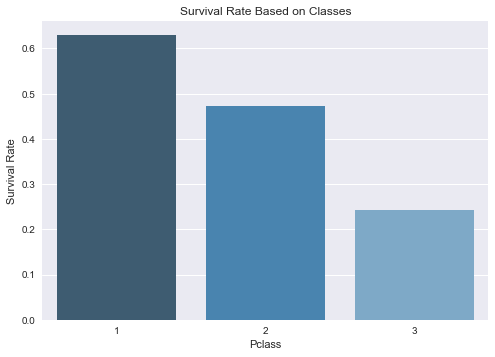

In [16]:
# Pclass analysis
temp01 = df[['Survived','Pclass']]
total = temp01.groupby('Pclass').Survived.count()
Proportion = total/total.sum()
print(total,Proportion)

# Survival Rate Based on pclass
barplot_survived_rate(temp01,'Pclass','Classes')

In [17]:
# Name Analysis
temp02 = df[['Survived','Name']]

# Check significant title from name
titles = ['Mr','Ms',"Mrs",'Dr','Miss','Master','Major']
for name in temp02.Name:
    check = False
    for i in titles:
        if i in name:
            check = True
    if not check:
        continue
        
# Extract title from name
titles_dict = {
    'Ms' : 'Ms',
    'Mrs': 'Mrs',
    'Mr' : 'Mr',
    'Dr' : 'Dr',
    'Miss': 'Ms',
    'Master': 'Master'
}
def extract_title(name):
    check = False
    for title in titles_dict.keys():
        if title in name:
            check = True
            return titles_dict[title]
    if not check:
        return 'Unclassified'

temp02['title'] = temp02['Name'].apply(extract_title)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


              Survived
title                 
Dr                   8
Master              40
Mr                 518
Mrs                129
Ms                 180
Unclassified        16               Survived
title                 
Dr            0.008979
Master        0.044893
Mr            0.581369
Mrs           0.144781
Ms            0.202020
Unclassified  0.017957


/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


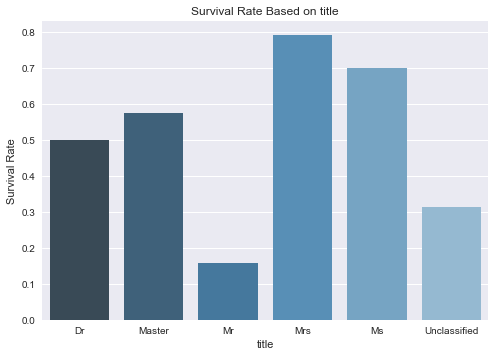

In [18]:
# Count title
total = temp02[['title','Survived']].groupby('title').count()
proportion = total/total.sum()
print(total,proportion)

# Probability of survival based on title
barplot_survived_rate(temp02,'title','title')

Sex
female    314
male      577
Name: Survived, dtype: int64 Sex
female    0.352413
male      0.647587
Name: Survived, dtype: float64


/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


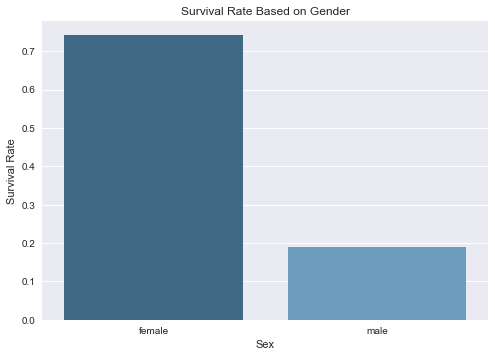

In [19]:
# Sex analysis
temp03 = df[['Survived','Sex']]
total = temp03.groupby('Sex').Survived.count()
proportion = total/total.sum()
print(total,proportion)

# Survival Rate Based on Gender
barplot_survived_rate(temp03,'Sex','Gender')

/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


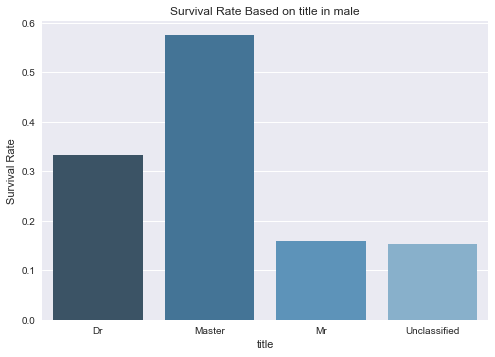

In [20]:
# Title in Male proportion analysis
temp04 = pd.concat([df.Survived,df.Sex,temp02.title],axis=1)
temp04 = temp04[temp04.Sex == 'male']

# Survival Rate based on the title in male proportion
barplot_survived_rate(temp04,'title',title='title in male')

Age range is 0.42-80.0
              Survived
Age                   
Unclassified  0.198653
adult         0.588103
elder         0.029181
teenage       0.184063


/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


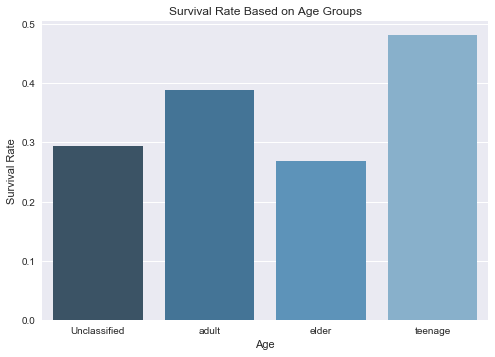

In [21]:
# Age analysis
temp05 = df[['Survived','Age']]
print('Age range is ' + str(temp05.Age.min()) + '-' + str(temp05.Age.max()))

# Divide into Age group
def divide_age(age):
    """
    Definition of age group
        teenage: 0 <= age < 20
        young adult: 20 <= age <40
        adult: 40 <= age < 60
        elder: 60 <= age < 81
    """
    age_group = {'teenage':(0,20),'adult':(20,60),'elder':(60,81)}
    for i,j in age_group.items():
        if age >= j[0] and age < j[1]:
            return i
    else:
        return 'Unclassified'

temp05['Age'] = temp05['Age'].apply(divide_age)
barplot = barplot_survived_rate(temp05,'Age',"Age Groups")

total = temp05.groupby('Age').count()
print(total/total.sum())
#total.reset_index(inplace=True)
#axes[1] = sns.barplot(data = total,x='Age',y='Survived')

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexes/base.py:3756: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return this.joi

family_size
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Survived, dtype: int64 family_size
0     0.602694
1     0.180696
2     0.114478
3     0.032548
4     0.016835
5     0.024691
6     0.013468
7     0.006734
10    0.007856
Name: Survived, dtype: float64


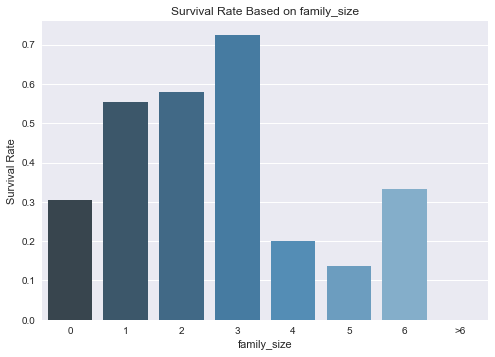

In [22]:
#Sibling and parch analysis
temp06 = df[['Survived','SibSp','Parch']]
temp06['family_size'] = temp06['SibSp'] + temp06['Parch']
total = temp06.groupby('family_size').Survived.count()
proportion = total/total.sum()
print(total,proportion)
#for i in ['SibSp','Parch','family_size']:
#g1 = barplot_survived_rate(temp06,'SibSp','SibSp')
#g2 = barplot_survived_rate(temp06,'Parch','Parch')


def group_large(x):
    if x > 6:
        return '>6'
    else:
        return x

temp06['family_size'] = temp06['family_size'].apply(group_large)
g3 = barplot_survived_rate(temp06,'family_size','family_size')


In [23]:
#Ticket Analysis
temp07 = df[['Survived','Ticket']]
def isnumeric(x):
    return x.isnumeric()

def notnumeric(x):
    return not x.isnumeric()

temp07_num = temp07.Ticket[temp07.Ticket.apply(isnumeric)]
temp07_nonnum = temp07.Ticket[temp07.Ticket.apply(notnumeric)]  

def grouping(x):
    
    def group_num(x):
        """
        Group by first three numbers
        """
        if x[:3].isnumeric():
            num = f"Num {x[0]}"
            return num, True
        else:
            return None,False
        
    def group_A(x):
        """
        Group by A initial
        """
        d = re.search(r'^A.*',x)
        if d:
            return 'initial A', True
        else:
            return None,False
    
    def group_C(x):
        """
        Group by C initial
        """
        d = re.search(r'^C.*',x)
        if d:
            return 'initial C', True
        else:
            return None,False
    
    def group_F(x):
        """
        Group by F initial
        """
        d = re.search(r'^F.*',x)
        if d:
            return 'initial F', True
        else:
            return None,False
    
    def group_P(x):
        """
        Group by P initial
        """
        d = re.search(r'^P.*',x)
        if d:
            return 'initial P', True
        else:
            return None,False
    
    def group_S(x):
        """
        Group by S initial
        """
        d = re.search(r'^S.*',x)
        if d:
            return 'initial S', True
        else:
            return None,False
    
    def group_W(x):
        """
        Group by W initial
        """
        d = re.search(r'^W.*',x)
        if d:
            return 'initial W', True
        else:
            return None,False
    
        
    num,check = group_num(x)
    if check:
        return num
    result,check = group_A(x)
    if check:
        return result
    result,check = group_C(x)
    if check:
        return result
    result,check = group_F(x)
    if check:
        return result
    result,check = group_P(x)
    if check:
        return result
    result,check = group_S(x)
    if check:
        return result
    result,check = group_W(x)
    if check:
        return result
    
    
temp07["Grouped_ticket"] = temp07.Ticket.apply(grouping)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Grouped_ticket
Num 1        146
Num 2        183
Num 3        301
Num 4         10
Num 5          3
Num 6          6
Num 7          9
Num 8          2
Num 9          1
initial A     29
initial C     47
initial F      7
initial P     65
initial S     65
initial W     13
Name: Survived, dtype: int64


/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


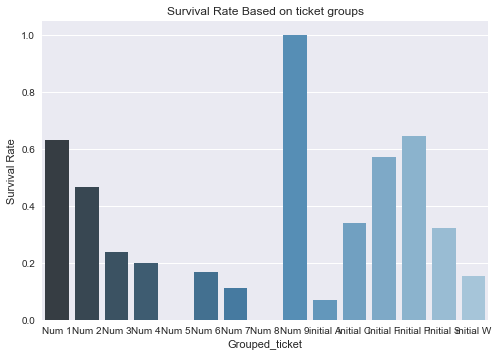

In [24]:
# Cont Ticket Analysis
total = temp07.groupby("Grouped_ticket").Survived.count()
print(total)
barplot_survived_rate(temp07,"Grouped_ticket","ticket groups")

In [25]:
df.Fare.isnull().sum()

0

{'group0': 56.925466666666665, 'group1': 113.85093333333333, 'group2': 170.7764, 'group3': 227.70186666666666, 'group4': 284.62733333333335, 'group5': 341.5528, 'group6': 398.4782666666667, 'group7': 455.4037333333333, 'group8': 512.3292}
Grouped_Fare
group0    762
group1     87
group2     22
group3      9
group4      8
group8      3
Name: Survived, dtype: int64


/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


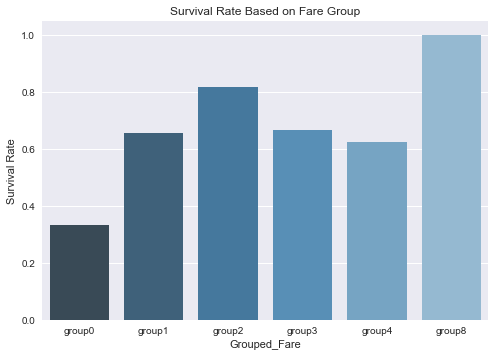

In [26]:
#Fare Analysis
temp08 = df[['Survived','Fare']]
statistic = temp08.groupby("Survived").Fare.describe()
#sns.boxplot(data = temp08, x = 'Survived', y = 'Fare')
#sns.barplot(data = temp08, x = 'Survived', y = 'Fare')

# boxcox transformation
trial01 = boxcox(temp08['Fare'][temp08['Fare']>0.0])

# Grouping Fare
maximum = max(temp08.Fare)
minimum = min(temp08.Fare)
L = 9
group = {f"group{i}":((i+1)*(maximum-minimum)/L) for i in range(L)}
print(group)
def grouping(x):
    for key in group.keys():
        if x > group[key]:
            continue
        else:
            return key

temp08['Grouped_Fare'] = temp08.Fare.apply(grouping)
total = temp08.groupby("Grouped_Fare").Survived.count()
print(total)
barplot_survived_rate(temp08,"Grouped_Fare","Fare Group")

{'group1': 7.7292, 'group2': 7.8958, 'group3': 8.6625, 'group4': 13.0, 'group5': 16.7, 'group6': 26.0, 'group7': 35.0, 'group8': 73.5, 'group9': 512.3292}


/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


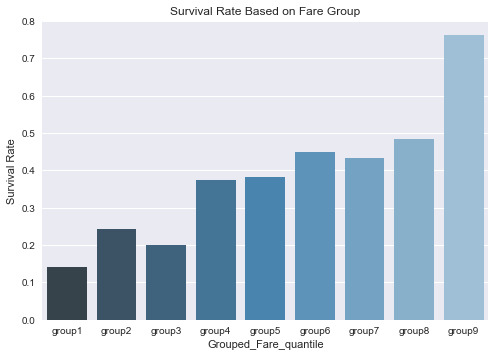

In [27]:
sorted_Fare = sorted(temp08.Fare)
length_Fare = len(temp08.Fare)
L = 9
k = int(length_Fare/L)
grouping_q = {}
for i in range(1,L+1):
    if k*i <= length_Fare-1:
        grouping_q[f'group{i}'] = sorted_Fare[k*i-1]
    else:
        grouping_q[f'group{i}'] = sorted_Fare[-1]

def grouping_quantile(x):
    for key in grouping_q.keys():
        if x > grouping_q[key]:
            continue
        else:
            return key

print(grouping_q)
temp08['Grouped_Fare_quantile'] = temp08.Fare.apply(grouping_quantile)
total = temp08.groupby('Grouped_Fare_quantile').Survived.count()
barplot_survived_rate(temp08,"Grouped_Fare_quantile","Fare Group")

In [28]:
print(total)

Grouped_Fare_quantile
group1     99
group2    124
group3     85
group4    120
group5     68
group6    100
group7     97
group8    101
group9     97
Name: Survived, dtype: int64


In [29]:
#Cabin Analysis
temp09 = df[["Survived","Cabin"]]
temp09.shape
print("Missing Data Proportion in this feature:",temp09.Cabin.isnull().sum()/891)

Missing Data Proportion in this feature: 0.7710437710437711


Embarked
C              168
No Embarked      2
Q               77
S              644
Name: Survived, dtype: int64


/Applications/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


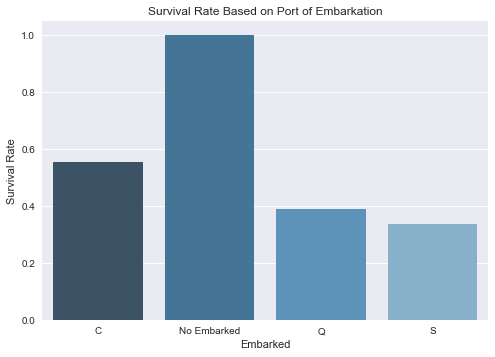

In [30]:
#Embarked Analysis
temp10 = df[["Survived","Embarked"]]
temp10.replace(np.NaN,'No Embarked',inplace=True)
temp10.Embarked.unique()
total = temp10.groupby("Embarked").Survived.count()
print(total)
barplot_survived_rate(temp10,"Embarked","Port of Embarkation")

# Feature Engineering



In [31]:
# One Hot features

one_hot_pclass = pd.get_dummies(temp01['Pclass'])
one_hot_title = pd.get_dummies(temp02['title'])
one_hot_age = pd.get_dummies(temp05['Age'])
one_hot_family_size = pd.get_dummies(temp06['family_size'])
one_hot_grouped_ticket = pd.get_dummies(temp07['Grouped_ticket'])
one_hot_grouped_fare_quantile = pd.get_dummies(temp08['Grouped_Fare_quantile'])
one_hot_embarked = pd.get_dummies(temp10['Embarked'])



In [32]:
# Concatenate all results

results = pd.concat([temp01["Survived"],
                     one_hot_pclass,
                     one_hot_title,
                     temp03['Sex'],
                     one_hot_age,
                     one_hot_family_size,
                     one_hot_grouped_ticket,
                     one_hot_grouped_fare_quantile,
                     one_hot_embarked
                    ],axis=1)

results = pd.concat([temp01["Survived"],
                     temp01["Pclass"],
                     #temp02['title'],
                     temp03['Sex'],
                     temp05['Age'],
                     temp06['family_size'],
                     #temp06['Parch'],
                     #temp06['SibSp'],
                     #temp07["Grouped_ticket"],
                     #temp08['Grouped_Fare_quantile'],
                     #temp10['Embarked']
                    ],axis=1)

In [33]:
results.head()

,Survived,1,2,3,Dr,Master,Mr,Mrs,Ms,Unclassified,...,group4,group5,group6,group7,group8,group9,C,No Embarked,Q,S
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
5,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
def numeric_sex(sex):
    if sex == 'male':
        return 1
    else:
        return 0

results['Sex'] = results['Sex'].apply(numeric_sex)

result = pd.get_dummies(results,columns=[#'title',
                                         'Age',
                                         #'Embarked',
                                         'Pclass',
                                         #'Grouped_Fare_quantile',
                                         'family_size',
                                         #'Grouped_ticket'
                                        ])

In [36]:
results.shape

(891, 51)

In [23]:
#result.drop(labels=["Embarked_No Embarked"],axis=1,inplace=True)

In [38]:
# output cleaned DataFrame to 'cleaneddata.csv'
results.to_csv('cleaneddata.csv',index=False)